ML - Task3 - Data Preprocessing
Objective:
 The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values,
outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, 
and usefulness of the data for machine learning.
Dataset:     Dataset for Data preprocessing
Key Components to be fulfilled:
Data Exploration:   Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming 
    of the columns.
Data Cleaning: 
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually
Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="C:\\Users\\afla1\\Downloads\\Employee.csv"
employee_data=pd.read_csv(url)
employee_data


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## datapreprocessing

In [4]:
employee_data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
employee_data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [6]:
employee_data.shape

(148, 6)

In [7]:
employee_data.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [10]:
employee_data.columns.tolist()

['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']

In [8]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
employee_data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [10]:
employee_data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

contains null values in **company,age,salary,place**

In [11]:
employee_data["Company"].fillna(employee_data["Company"].mode()[0],inplace=True)

In [31]:
employee_data["Place"].fillna(employee_data["Place"].mode()[0],inplace=True)

In [32]:
employee_data.fillna(employee_data["Salary"].mean(),inplace=True)


In [37]:
employee_data["Age"]=employee_data["Age"].replace(0,np.nan)

In [38]:
employee_data["Age"].fillna(employee_data["Age"].median(),inplace=True)

In [12]:
employee_data.isnull().sum()

Company     0
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [14]:
employee_data.duplicated().sum()

4

In [15]:
employee_data=employee_data.drop_duplicates()
employee_data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [16]:
employee_data.duplicated().sum()

0

In [17]:
employee_data.shape

(144, 6)

In [12]:
employee_data.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [40]:
employee_data["Company"].value_counts()

Company
TCS                          60
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [41]:
employee_data["Place"].value_counts()

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [42]:
employee_data["Age"].value_counts()

Age
33.000000      19
5283.471074    17
22.000000      15
44.000000      10
23.000000       8
34.000000       8
32.000000       7
21.000000       7
35.000000       6
41.000000       5
24.000000       4
45.000000       4
31.000000       3
40.000000       3
43.000000       3
36.000000       3
25.000000       3
20.000000       3
46.000000       2
26.000000       2
30.000000       2
50.000000       2
37.000000       2
19.000000       1
38.000000       1
51.000000       1
18.000000       1
17.000000       1
54.000000       1
Name: count, dtype: int64

In [43]:
employee_data["Gender"].value_counts()

Gender
0    112
1     32
Name: count, dtype: int64

**checking outliers**

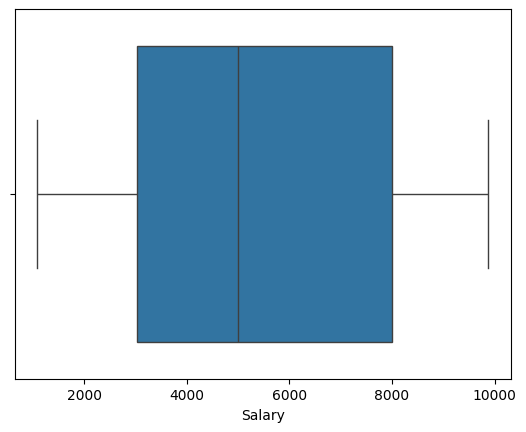

In [50]:
sns.boxplot(x="Salary",data=employee_data)
plt.show()

<Axes: xlabel='Salary', ylabel='Count'>

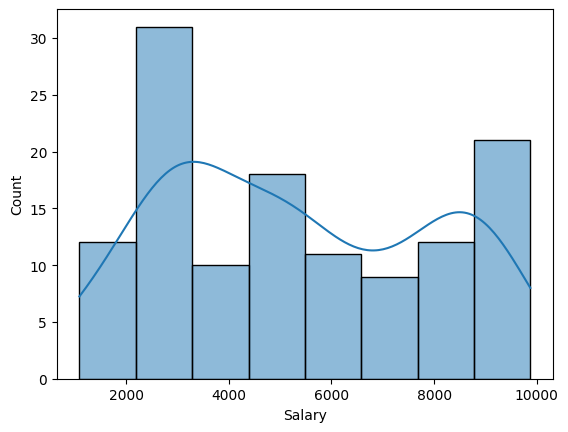

In [4]:
sns.histplot(employee_data["Salary"],kde=True)

<Axes: xlabel='Company'>

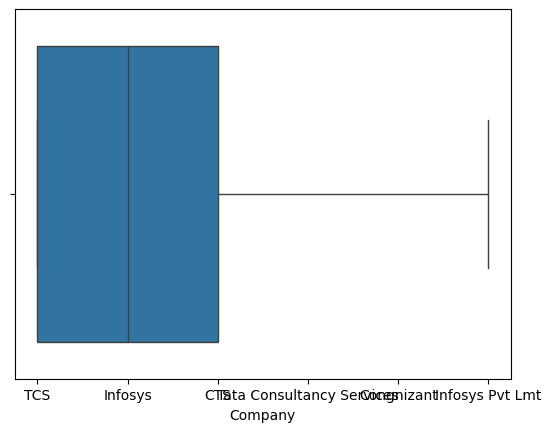

In [61]:
sns.boxplot(x="Company",data=employee_data)

<Axes: xlabel='Company', ylabel='Salary'>

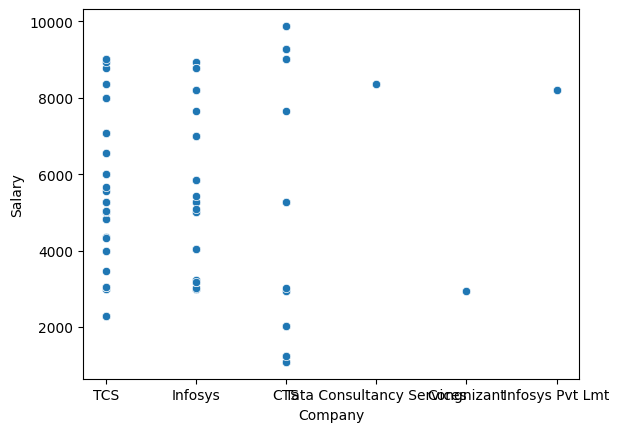

In [49]:
sns.scatterplot(x="Company",y="Salary",data=employee_data)

<Axes: xlabel='Place'>

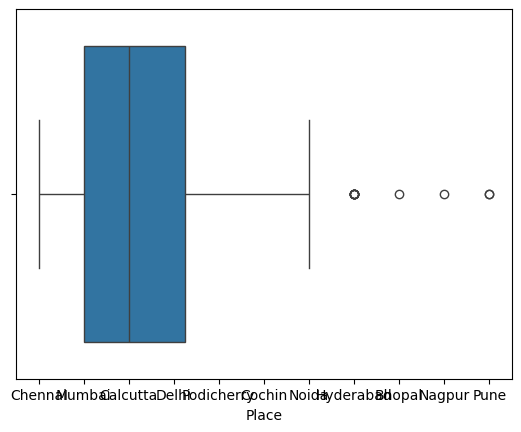

In [62]:
sns.boxplot(x='Place',data=employee_data)

<Axes: xlabel='Age'>

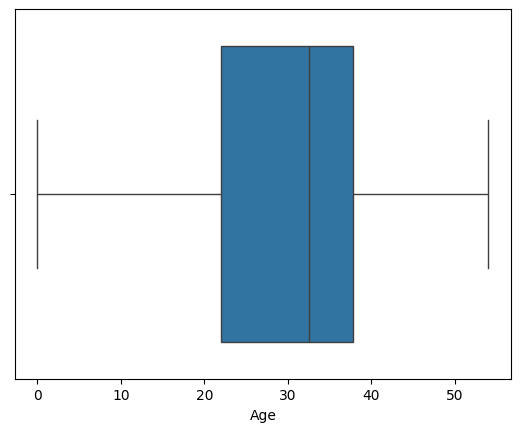

In [45]:
sns.boxplot(x="Age",data=employee_data)

**handling outlier**

In [47]:
from sklearn.datasets import load_diabetes

In [51]:

Q1=np.percentile(employee_data["Age"],25,interpolation="midpoint")
Q3=np.percentile(employee_data["Age"],75,interpolation="midpoint")

IQR=Q3-Q1
print(IQR)

print("old shape :",employee_data.shape)

lower=np.where(employee_data["Age"] <= (Q1 - 1.5 * IQR))

upper=np.where(employee_data["Age"] >= (Q3 + 1.5 * IQR))

employee_data.drop(lower[0],inplace=True)
employee_data.drop(upper[0],inplace=True)

print("new shape :",employee_data.shape)
 



                     

nan
old shape : (148, 6)
new shape : (148, 6)


<Axes: xlabel='Age'>

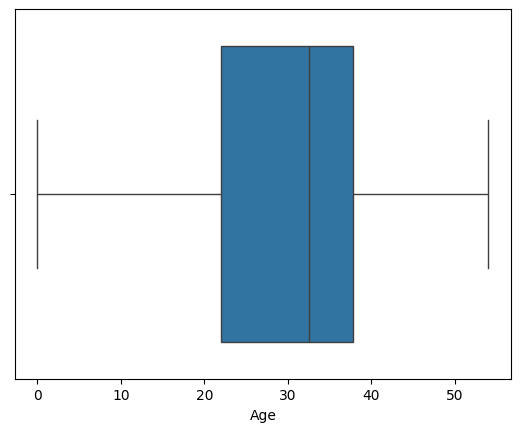

In [49]:
sns.boxplot(x="Age",data=employee_data)

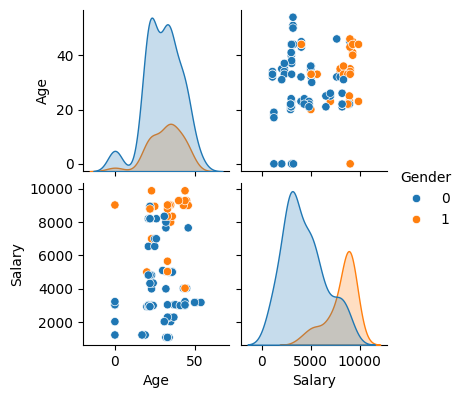

In [19]:
sns.pairplot(employee_data,hue="Gender",height=2)

**Filter the data with age >40 and salary<5000**


In [51]:
filtered_data=employee_data[(employee_data["Age"]>40) & (employee_data["Salary"]<5000)]
filtered_data.head()

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


**Plot the chart with age and salary**


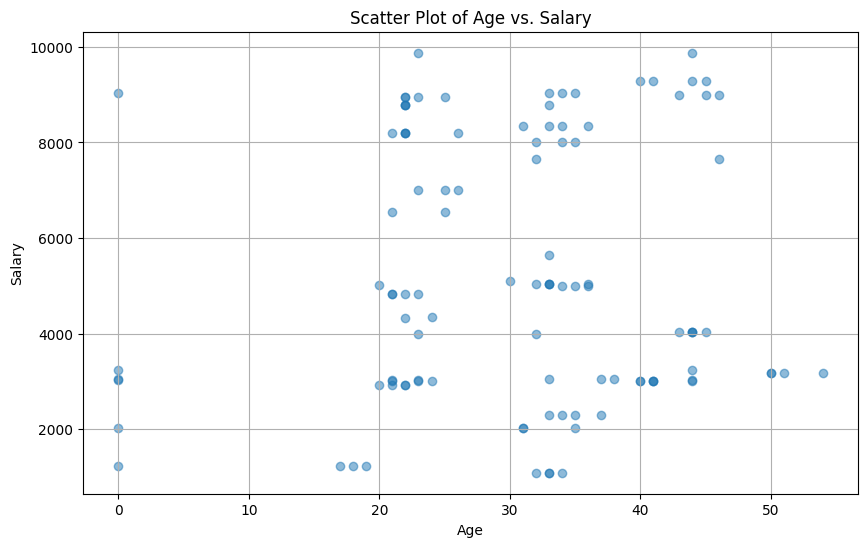

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(employee_data['Age'], employee_data['Salary'],alpha=0.5)
plt.title('Scatter Plot of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
#plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

**Count the number of people from each place and represent it visually**


<Axes: xlabel='Place', ylabel='count'>

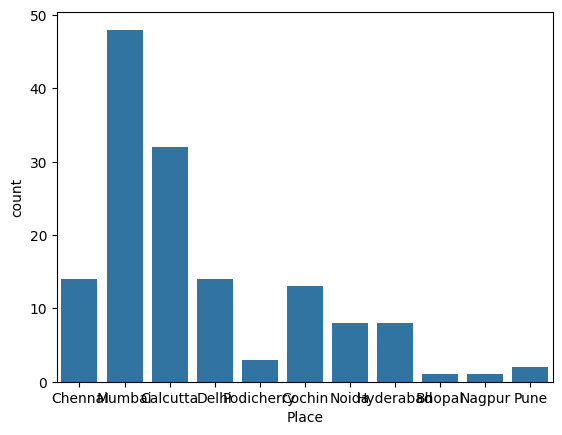

In [71]:
sns.countplot(x="Place",data=employee_data)



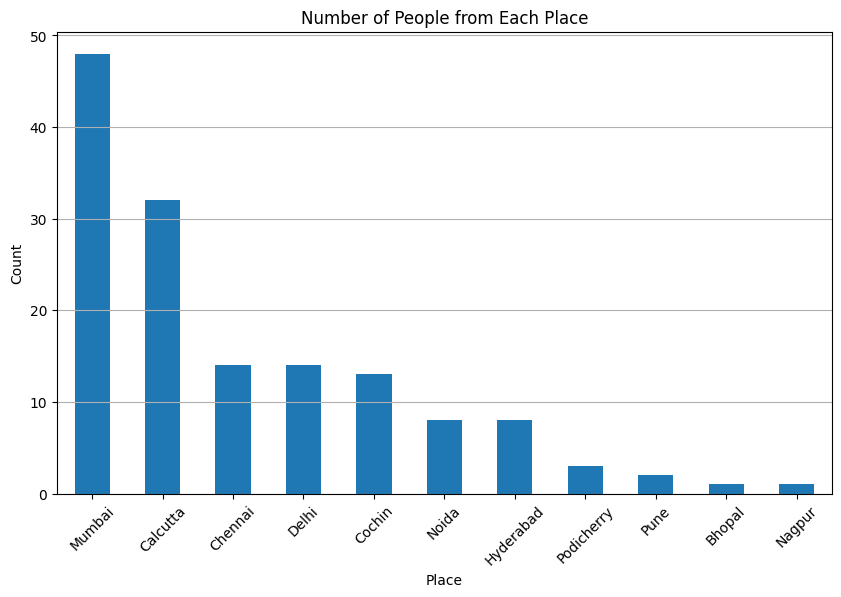

In [76]:
plt.figure(figsize=(10, 6))
place_count.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()

In [87]:
categorical_columns = employee_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns


['Company', 'Place', 'Country']

# data encoding

Converting categorical variables into numerical representations using techniques such as one-hot encoding & label encoding, making them suitable for analysis by machine learning algorithms.

  Here the categorical variables are coming under 'Company','Place','Country'. We have to convert those categorical variables into numerical variables

**one hot encoding**

In [27]:
employee_data["Company"].unique()

array(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'], dtype=object)

In [28]:
employee_data["Company"].value_counts()

Company
TCS                          60
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64

In [30]:
employee_data["Place"].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [31]:
employee_data["Place"].value_counts()

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

In [32]:
employee_data["Country"].value_counts()

Country
India    144
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
one_hot_encoded_data=pd.get_dummies(employee_data,columns=["Company","Place","Country"])
one_hot_encoded_data

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,NaN,0,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
1,30.0,NaN,0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.0,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,0,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.0,0,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
143,33.0,9024.0,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.0,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.0,1,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True


In [35]:
encoded_data=pd.get_dummies(employee_data[["Company","Place","Country"]])
encoded_data=encoded_data.astype(int)
encoded_data

,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
143,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
145,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
146,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [36]:
employee_data=pd.concat([employee_data,encoded_data],axis=1)

In [37]:
employee_data

,Company,Age,Salary,Place,Country,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,20.0,NaN,Chennai,India,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Infosys,30.0,NaN,Mumbai,India,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,TCS,35.0,2300.0,Calcutta,India,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Infosys,40.0,3000.0,Delhi,India,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,TCS,23.0,4000.0,Mumbai,India,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
143,TCS,33.0,9024.0,Calcutta,India,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145,Infosys,44.0,4034.0,Delhi,India,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
146,TCS,33.0,5034.0,Mumbai,India,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
employee_data.drop(["Company","Place","Country"],axis=1,inplace=True)

In [39]:
employee_data

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,NaN,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,30.0,NaN,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,35.0,2300.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,40.0,3000.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,23.0,4000.0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
143,33.0,9024.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
145,44.0,4034.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
146,33.0,5034.0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


**label_encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ["Company", "Place", "Country"]

#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label_encoded = employee_data.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label_encoded[col] = label_encoder.fit_transform(employee_data[col])

print(df_label_encoded)

     Company   Age  Salary  Place  Country  Gender
0          4  20.0     NaN      2        0       0
1          2  30.0     NaN      6        0       0
2          4  35.0  2300.0      1        0       0
3          2  40.0  3000.0      4        0       0
4          4  23.0  4000.0      6        0       0
..       ...   ...     ...    ...      ...     ...
142        3  22.0  8202.0      6        0       0
143        4  33.0  9024.0      1        0       1
145        2  44.0  4034.0      4        0       1
146        4  33.0  5034.0      6        0       1
147        2  22.0  8202.0      3        0       0

[144 rows x 6 columns]


In [11]:
#initialize
labelencoder=LabelEncoder()
employee_data["Gender"]=labelencoder.fit_transform(employee_data["Gender"])
employee_data["Gender"].unique()

array([0, 1], dtype=int64)

In [21]:
employee_data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# feature scaling

Feature scaling is a technique used in machine learning and data preprocessing to standardize the range of independent variables or features in the dataset. The goal of feature scaling is to ensure that all features contribute equally to the analysis and modeling process, preventing features with larger scales from dominating those with smaller scales.

## MinMax scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

Columns_to_Scale=employee_data[['Age','Salary']]

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = employee_data.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

             Company       Age    Salary     Place Country  Gender
0                TCS  0.370370       NaN   Chennai   India       0
1            Infosys  0.555556       NaN    Mumbai   India       0
2                TCS  0.648148  0.137817  Calcutta   India       0
3            Infosys  0.740741  0.217480     Delhi   India       0
4                TCS  0.425926  0.331285    Mumbai   India       0
..               ...       ...       ...       ...     ...     ...
142  Infosys Pvt Lmt  0.611111  0.448959    Mumbai   India       0
143              TCS  0.407407  0.809491  Calcutta   India       1
145          Infosys       NaN       NaN     Delhi   India       1
146              TCS       NaN       NaN    Mumbai   India       1
147          Infosys       NaN       NaN    Cochin   India       0

[144 rows x 6 columns]


In [24]:
#dataframe after label encoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

     Company       Age    Salary  Place  Country  Gender
0          4  0.370370       NaN      2        0       0
1          2  0.555556       NaN      6        0       0
2          4  0.648148  0.137817      1        0       0
3          2  0.740741  0.217480      4        0       0
4          4  0.425926  0.331285      6        0       0
..       ...       ...       ...    ...      ...     ...
142        3  0.611111  0.448959      6        0       0
143        4  0.407407  0.809491      1        0       1
145        2       NaN       NaN      4        0       1
146        4       NaN       NaN      6        0       1
147        2       NaN       NaN      3        0       0

[144 rows x 6 columns]


In [40]:
#dataframe after OneHotEncoding & minmax scaling

# Initialize a new DataFrame to store after applying standard scaler
df_minmax = one_hot_encoded_data.copy()

# Replace scaled columns in the original DataFrame
df_minmax[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_minmax)

          Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0    0.370370       NaN       0        False               False   
1    0.555556       NaN       0        False               False   
2    0.648148  0.137817       0        False               False   
3    0.740741  0.217480       0        False               False   
4    0.425926  0.331285       0        False               False   
..        ...       ...     ...          ...                 ...   
142  0.611111  0.448959       0        False               False   
143  0.407407  0.809491       1        False               False   
145       NaN       NaN       1        False               False   
146       NaN       NaN       1        False               False   
147       NaN       NaN       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False        False 

In [11]:
Q1_salary=employee_data["Salary"].quantile(0.25)
Q3_salary=employee_data["Salary"].quantile(0.75)
print("Q1 salary :",Q1_salary)
print("Q3  SALARY :",Q3_salary)

Q1 salary : 3030.0
Q3  SALARY : 8000.0


In [12]:
IQR=Q3_salary-Q1_salary
IQR

4970.0

In [13]:
UPPER_WHISKER=Q3_salary+(1.5*IQR)
LOWER_WHISKER=Q1_salary-(1.5*IQR)
UPPER_WHISKER,LOWER_WHISKER

(15455.0, -4425.0)

In [14]:
outliers_salary=employee_data.loc[(employee_data["Salary"]>LOWER_WHISKER)&(employee_data["Salary"]<UPPER_WHISKER)]
print("length of outlier_salary :",len(outliers_salary))
print("length of original dataset :",len(employee_data["Salary"]))

length of outlier_salary : 124
length of original dataset : 148


In [15]:
Q1_age=employee_data["Age"].quantile(0.25)
Q3_age=employee_data["Age"].quantile(0.75)
print("Q1 :",Q1_age)
print("Q3 :",Q3_age)

Q1 : 22.0
Q3 : 37.75


In [15]:
IQR_age=Q3_age-Q1_age
IQR_age

15.75

In [17]:
upper_whisker=Q3_age+(1.5*IQR_age)
lower_whisker=Q1_age-(1.5*IQR_age)
upper_whisker,lower_whisker


(61.375, -1.625)

In [19]:
outlier_age=employee_data.loc[(employee_data["Age"]>lower_whisker)&(employee_data["Age"]<upper_whisker)]
print("length of the value above and below the upper and lower whisker :",len(outlier_age))
print("length of old dataset :",len(employee_data["Age"]))

length of the value above and below the upper and lower whisker : 130
length of old dataset : 148


**there is no outlier in the age column,there is no significant deviation in the age of employee working in fiffrent average age is same for every employees**

# standardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

Columns_to_Scale=employee_data[['Age','Salary']]
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(Columns_to_Scale)

# Transform the data
scaled_data = scaler.transform(Columns_to_Scale)

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])

# Initialize a new DataFrame to store after applying standard scaler
df_standard = employee_data.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

          Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0   -0.950924       NaN       0            0                   0   
1   -0.047653       NaN       0            0                   0   
2    0.403983 -1.158779       0            0                   0   
3    0.855618 -0.886899       0            0                   0   
4   -0.679943 -0.498500       0            0                   0   
..        ...       ...     ...          ...                 ...   
142  0.223328 -0.096894       0            0                   0   
143 -0.770270  1.133555       1            0                   0   
145       NaN       NaN       1            0                   0   
146       NaN       NaN       1            0                   0   
147       NaN       NaN       0            0                   0   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0                  0                        0            1   
1                  1                        0            0 

In [43]:
#dataframe after label encoding & standard scaling


# Initialize a new DataFrame to store after applying standard scaler
df_standard = df_label_encoded.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

     Company       Age    Salary  Place  Country  Gender
0          4 -0.950924       NaN      2        0       0
1          2 -0.047653       NaN      6        0       0
2          4  0.403983 -1.158779      1        0       0
3          2  0.855618 -0.886899      4        0       0
4          4 -0.679943 -0.498500      6        0       0
..       ...       ...       ...    ...      ...     ...
142        3  0.223328 -0.096894      6        0       0
143        4 -0.770270  1.133555      1        0       1
145        2       NaN       NaN      4        0       1
146        4       NaN       NaN      6        0       1
147        2       NaN       NaN      3        0       0

[144 rows x 6 columns]


In [45]:
#dataframe after OneHotEncoding & standard scaling

# Initialize a new DataFrame to store after applying standard scaler
df_standard = one_hot_encoded_data.copy()

# Replace scaled columns in the original DataFrame
df_standard[['Age', 'Salary']] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_standard)

          Age    Salary  Gender  Company_CTS  Company_Congnizant  \
0   -0.950924       NaN       0        False               False   
1   -0.047653       NaN       0        False               False   
2    0.403983 -1.158779       0        False               False   
3    0.855618 -0.886899       0        False               False   
4   -0.679943 -0.498500       0        False               False   
..        ...       ...     ...          ...                 ...   
142  0.223328 -0.096894       0        False               False   
143 -0.770270  1.133555       1        False               False   
145       NaN       NaN       1        False               False   
146       NaN       NaN       1        False               False   
147       NaN       NaN       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False        False 